# Exercise 1 - Data storytelling

## 3. Exploring and explaining happiness

In [4]:
import pandas as pd

df = pd.read_excel("data/happiness.xlsx")
df.set_index("Country name")

,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,
Finland,7.7407,7.814808,7.666591,1.844054,1.572367,0.694793,0.859294,0.141674,0.546158,2.082367
Denmark,7.5827,7.665297,7.500103,1.907798,1.520361,0.698944,0.822740,0.203579,0.548413,1.880887
Iceland,7.5251,7.617527,7.432673,1.880718,1.616525,0.718345,0.818509,0.258344,0.182473,2.050233
Sweden,7.3441,7.421563,7.266637,1.878146,1.500826,0.723871,0.838269,0.221455,0.523795,1.657707
Israel,7.3411,7.405165,7.277036,1.802934,1.512793,0.739816,0.641463,0.153205,0.192823,2.298026
...,...,...,...,...,...,...,...,...,...,...
Congo (Kinshasa),3.2954,3.462328,3.128472,0.533670,0.664700,0.261508,0.472705,0.188676,0.072167,1.102014
Sierra Leone,3.2452,3.366252,3.124148,0.654278,0.565977,0.253321,0.469035,0.181365,0.053299,1.067906
Lesotho,3.1862,3.468785,2.903615,0.770807,0.850587,0.000000,0.523188,0.082087,0.084969,0.874525


In [6]:
happy_top10 = df.iloc[:10]
happy_top10

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.7407,7.814808,7.666591,1.844054,1.572367,0.694793,0.859294,0.141674,0.546158,2.082367
1,Denmark,7.5827,7.665297,7.500103,1.907798,1.520361,0.698944,0.822740,0.203579,0.548413,1.880887
2,Iceland,7.5251,7.617527,7.432673,1.880718,1.616525,0.718345,0.818509,0.258344,0.182473,2.050233
3,Sweden,7.3441,7.421563,7.266637,1.878146,1.500826,0.723871,0.838269,0.221455,0.523795,1.657707
4,Israel,7.3411,7.405165,7.277036,1.802934,1.512793,0.739816,0.641463,0.153205,0.192823,2.298026
5,Netherlands,7.3194,7.382576,7.256223,1.900657,1.462047,0.705883,0.725081,0.247361,0.372421,1.905913
6,Norway,7.3017,7.388734,7.214666,1.951956,1.516540,0.703792,0.835376,0.224143,0.483933,1.585945
7,Luxembourg,7.1219,7.212736,7.031064,2.140519,1.354626,0.707604,0.801213,0.145682,0.432411,1.539837
8,Switzerland,7.0602,7.147415,6.972985,1.970268,1.424932,0.746744,0.759160,0.173306,0.497613,1.488149
9,Australia,7.0569,7.140660,6.973140,1.854258,1.461091,0.692018,0.756271,0.225208,0.323352,1.744744


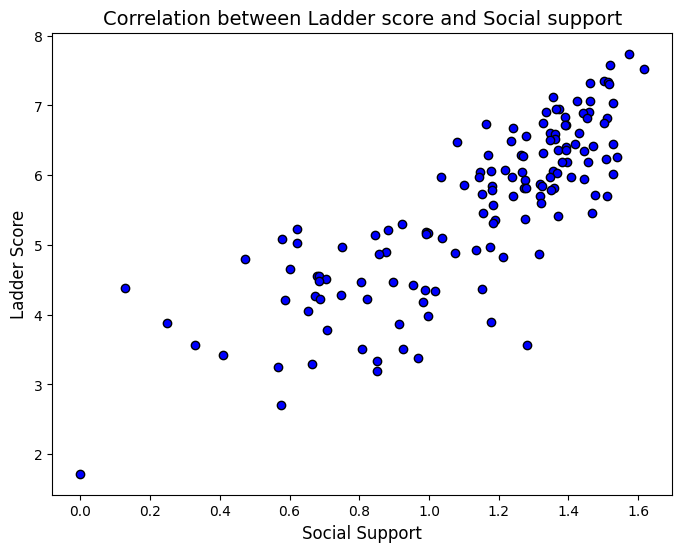

In [11]:
import matplotlib.pyplot as plt
# Plotting the correlation between Ladder score and Social support
plt.figure(figsize=(8, 6))
plt.scatter(df['Explained by: Social support'], df['Ladder score'], color='blue', edgecolors='black')

# Adding labels and title
plt.title('Correlation between Ladder score and Social support', fontsize=14)
plt.xlabel('Social Support', fontsize=12)
plt.ylabel('Ladder Score', fontsize=12)

# Show plot
plt.show()

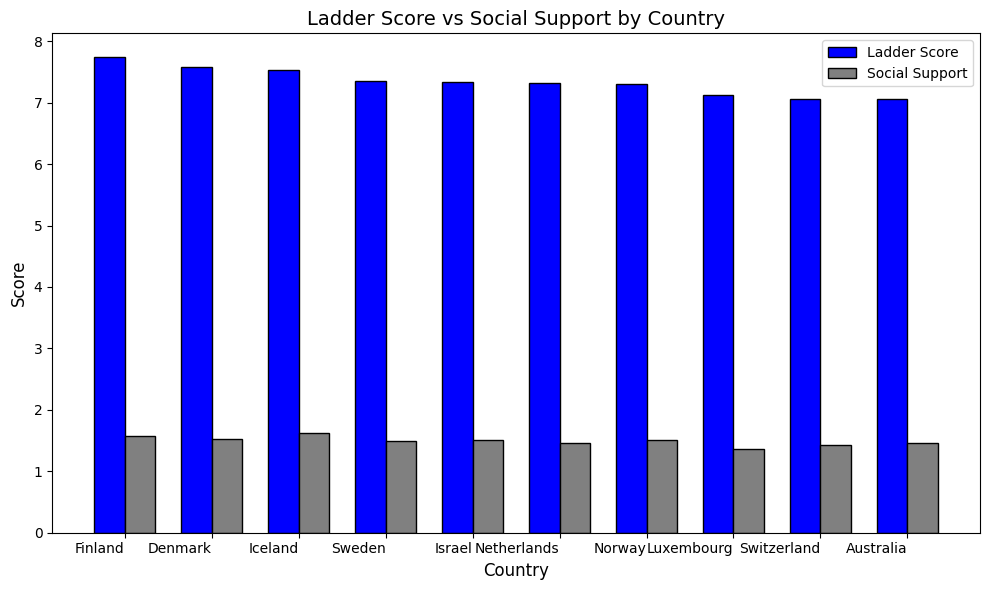

In [ ]:
# Bar width
bar_width = 0.35

# X positions for each country
r1 = np.arange(len(happy_top10["Country name"]))
r2 = [x + bar_width for x in r1]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for Ladder score (left) and Social support (right)
ax.bar(r1, happy_top10['Ladder score'], color='blue', width=bar_width, edgecolor='black', label='Ladder Score')
ax.bar(r2, happy_top10['Explained by: Social support'], color='gray', width=bar_width, edgecolor='black', label='Social Support')

# Customize the chart
ax.set_title('Ladder Score vs Social Support by Country', fontsize=14)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Score', fontsize=12)

# Set the x-ticks to be in the middle of the two sets of bars
ax.set_xticks([r + bar_width / 2 for r in r1])
ax.set_xticklabels(happy_top10["Country name"], rotation=0, ha='right')

# Add a legend
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()

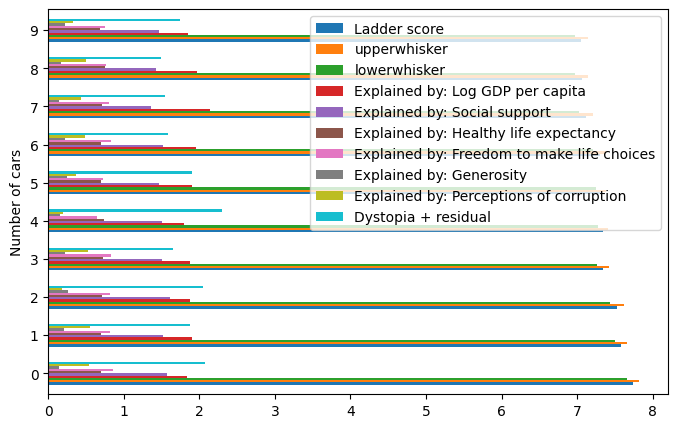

In [17]:
ax = happy_top10.plot(
    kind="barh", 
    ylabel="Number of cars", 
    figsize = (8,5), 
    width = 0.6
)